In [11]:
import pandas as pd
df = pd.read_csv('/Users/gautamborgohain/Google Drive/Datasets/D6 Wine quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


<IPython.core.display.Javascript object>


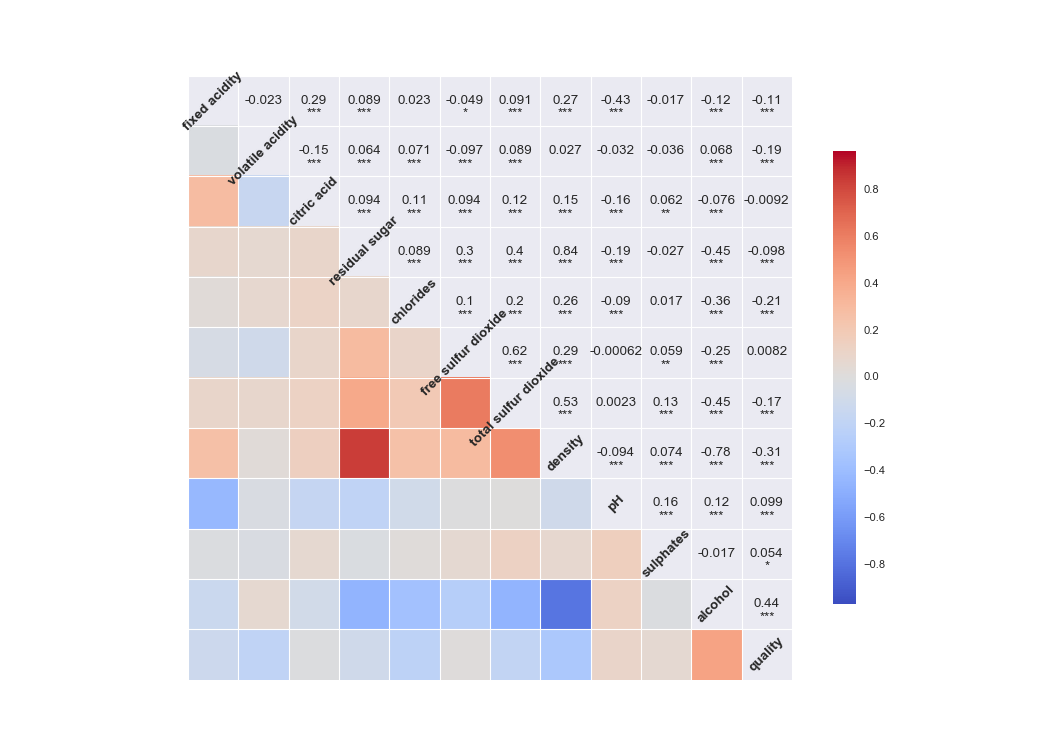

In [35]:
import seaborn as sns
%matplotlib notebook
sns.corrplot(df)

<IPython.core.display.Javascript object>


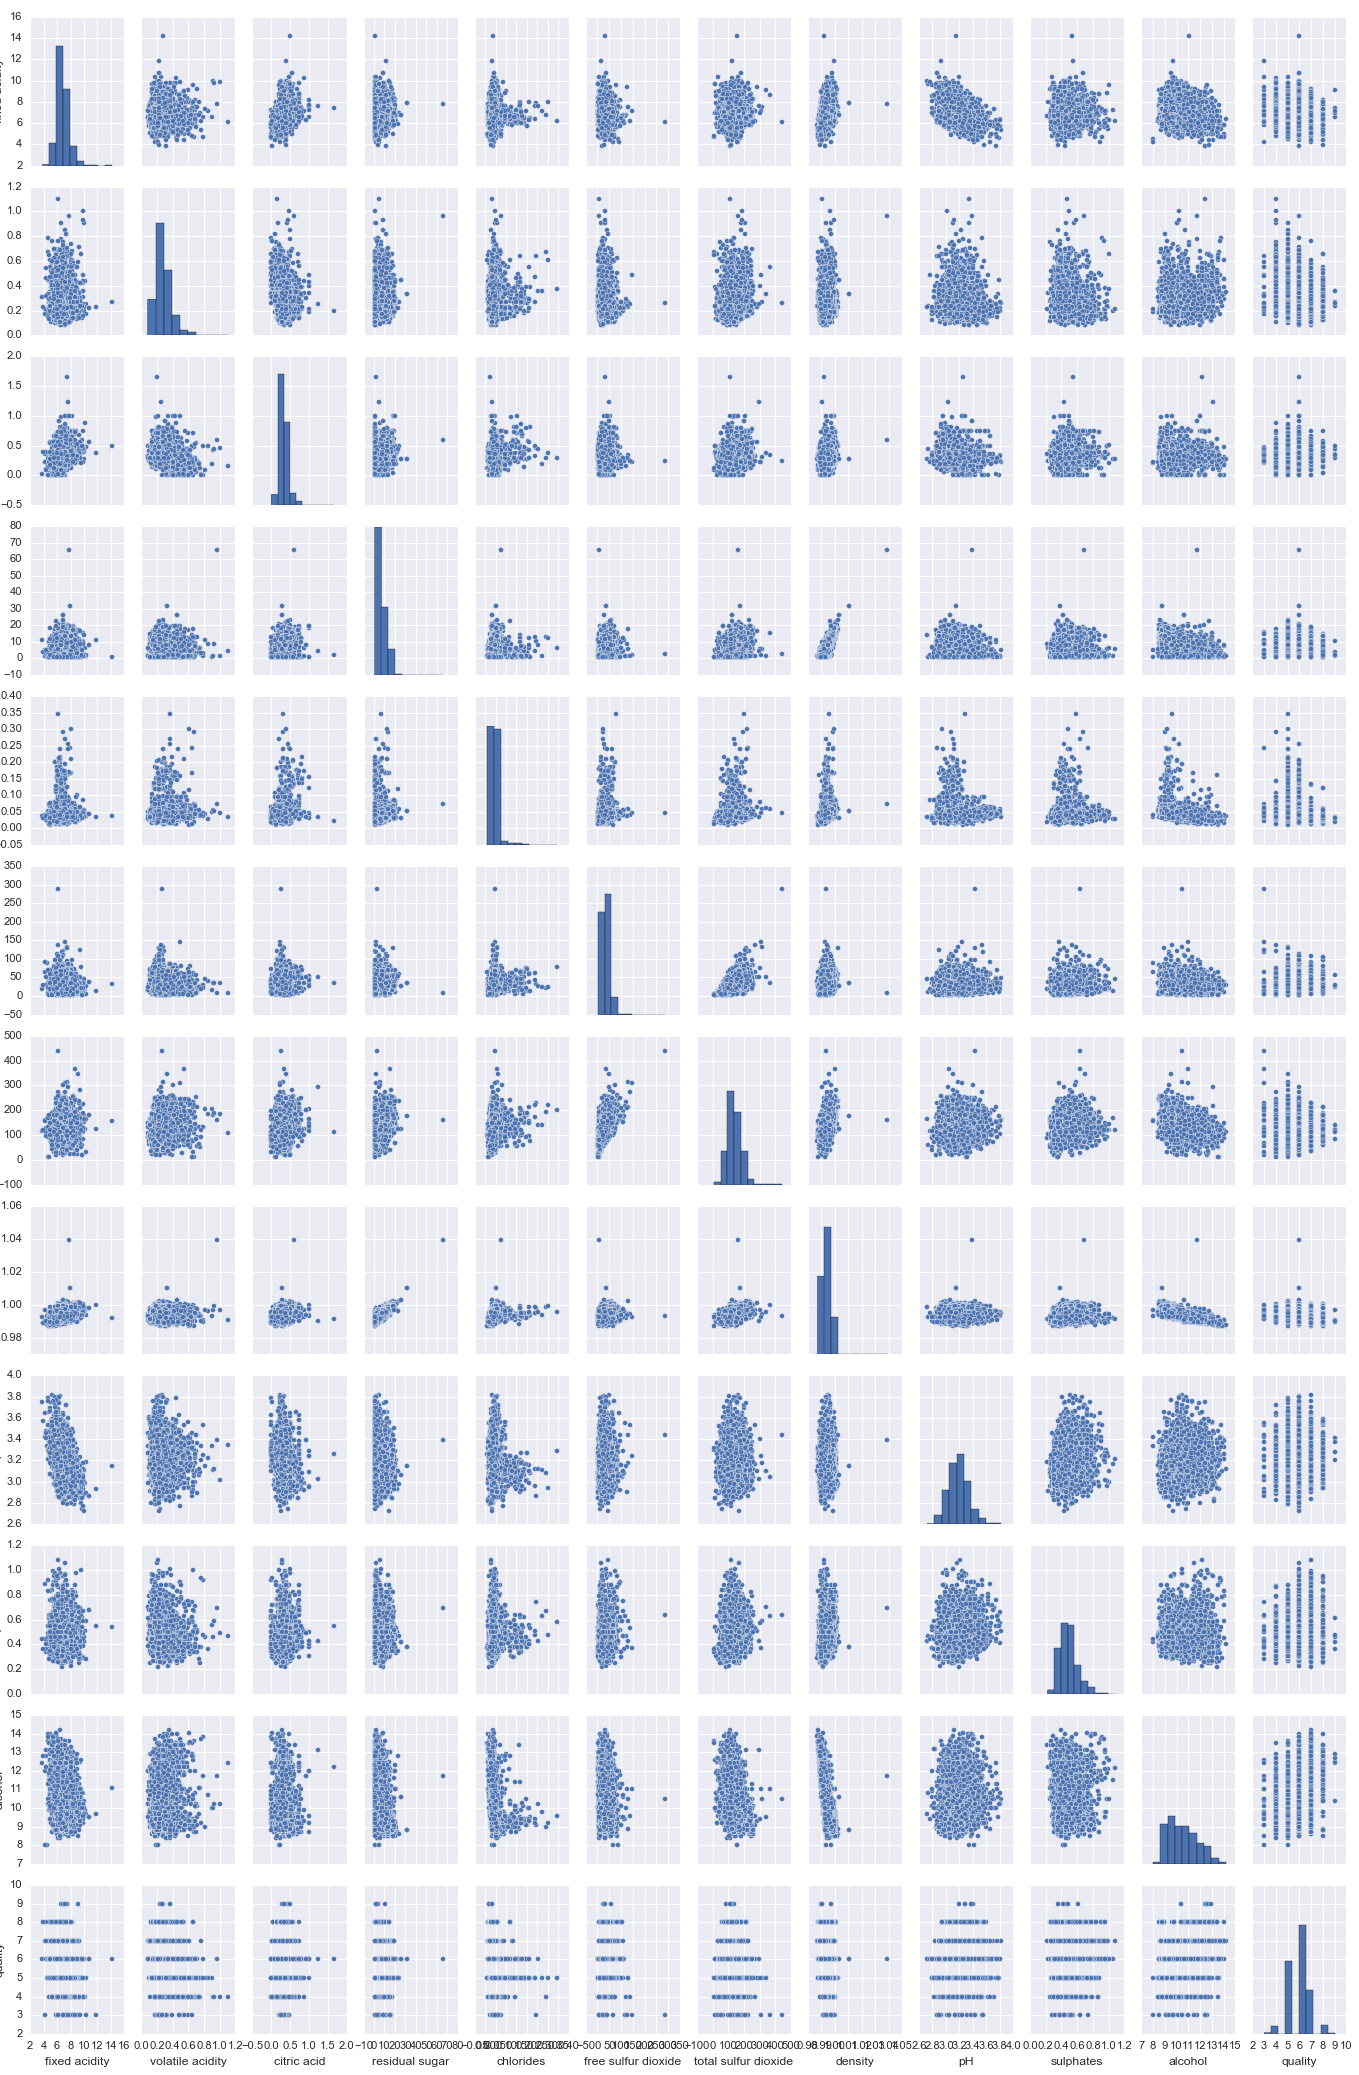

In [34]:
sns.pairplot(df)

In [14]:

from sklearn.cross_validation import train_test_split

y = df.quality
X = df.copy()
X.drop('quality', axis = 1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state = 1)
len(X_train)



3428

In [16]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_train,y_train))
print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

0.552380952381
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        39
          5       0.60      0.43      0.50       438
          6       0.53      0.82      0.65       655
          7       0.60      0.27      0.37       286
          8       1.00      0.15      0.25        48

avg / total       0.56      0.55      0.52      1470



/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X2 = X[['volatile acidity','alcohol','density','total sulfur dioxide']]

X_train2, X_test2, y_train, y_test = train_test_split(X2,y,train_size = 0.7,random_state = 1)

lm.fit(X_train2,y_train)

pred_train = lm.predict(X_train2)
preds_test = lm.predict(X_test2)
print(lm.score(X_train2,y_train))


0.251793399656


<IPython.core.display.Javascript object>


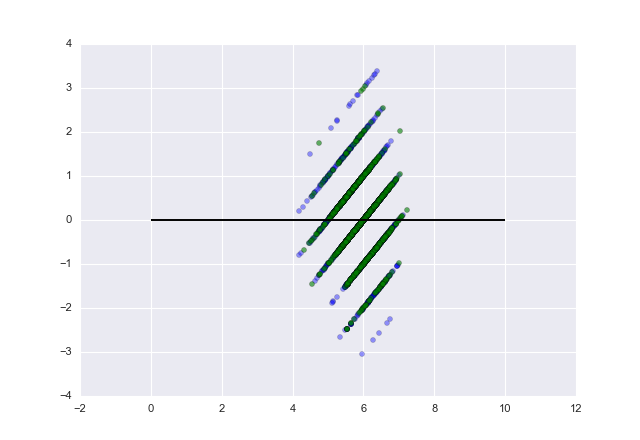

In [56]:
import matplotlib.pyplot as plt
plt.scatter(pred_train, pred_train - y_train, c = 'b', alpha = 0.4)
plt.scatter(preds_test, preds_test - y_test, c = 'g', alpha = 0.6)
plt.hlines(y = 0, xmin = 0, xmax = 10)
plt.show()

Object `_convertToOneOfMany` not found.


In [1]:
from theano import tensor 
x = tensor.matrix('features')

In [5]:
?tensor.matrix

In [4]:
from blocks.bricks import Linear, Rectifier, Softmax
import fuel